# DKRZ tutorial

# NINO SST Index Computation with CDO

**Learning content**

- read data from netCDF file
- extract data for NINO areas
- compute climatology
- compute anomalies
- compute weighted anomalies
- compute running mean
- compute NINO 3.4 Index
- plotting

**Definition of NINO SST Indices:**

https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni

> There are several indices used to monitor the tropical Pacific, all of which are based on SST anomalies averaged across a given region.  Usually the anomalies are computed relative to a base period of 30 years.  The Niño 3.4 index and the Oceanic Niño Index (ONI) are the most commonly used indices to define El Niño and La Niña events.  Other indices are used to help characterize the unique nature of each event. A discussion of El Niño and its impacts is provided in the Expert Guidance by Dr. Kevin Trenberth.
>
> The numbers of the Niño 1,2,3, and 4 regions correspond with the labels assigned to ship tracks that crossed these regions.  Data from these tracks enabled the historic records of El Niño to be carried back in time to 1949, as discussed in a classic study by Rasmusson and Carpenter (1982).
>
> **Niño 1+2 (0-10S, 90W-80W):**  The Niño 1+2 region is the smallest and eastern-most of the Niño SST regions, and corresponds with the region of coastal South America where El Niño was first recognized by the local populations.  This index tends to have the largest variance of the Niño SST indices.
>
> **Niño 3 (5N-5S, 150W-90W):**  This region was once the primary focus for monitoring and predicting El Niño, but researchers later learned that the key region for coupled ocean-atmosphere interactions for ENSO lies further west (Trenberth, 1997).  Hence, the Niño 3.4 and ONI became favored for defining El Niño and La Niña events.
>
> **Niño 3.4 (5N-5S, 170W-120W):**  The  Niño 3.4 anomalies may be thought of as representing the average equatorial SSTs across the Pacific from about the dateline to the South American coast.  The Niño 3.4 index typically uses a 5-month running mean, and El Niño or La  Niña events are defined when the  Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more.
>
> **ONI (5N-5S, 170W-120W):** The ONI uses the same region as the Niño 3.4 index.  The ONI uses a 3-month running mean, and to be classified as a full-fledged El Niño or La Niña, the anomalies must exceed +0.5C or -0.5C for at least five consecutive months.  This is the operational definition used by NOAA.
>
> **Niño 4 (5N-5S, 160E-150W):** The  Niño 4 index captures SST anomalies in the central equatorial Pacific.  This region tends to have less variance than the other Niño regions.
>
> To define the unique character of each El Niño or La Niña event, Trenberth and Stepaniak (2001) argue that the Niño 3.4 index should be used in combination with an index that  they introduce, called the Trans-Niño Index (TNI).  The TNI is defined to be the difference in normalized SST anomalies between the Niño 1+2 and Niño 4 regions.  The TNI thus measures the gradient in SST anomalies between the central and eastern equatorial Pacific.  When the SST gradient is particularly large (say, due to positive anomalies in the Niño 4 region and negative anomalies in the Niño 1+2 region), some researchers classify the event as a "central Pacific El Niño " or "El  Niño Modoki," although the distinction of this type of event as a seperate phenonomenon is a matter or debate.

<br>

2021 copyright DKRZ, kmf

<br>

----


In [1]:
import os
import xarray as xr
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cdo import *
cdo = Cdo()

In [2]:
%matplotlib inline

## Function draw_boundary()


In [3]:
def draw_boundary(ax, lon0, lon1, lat0, lat1, title=''):
    lon_corners  = np.array([lon0, lon1,lon1, lon0])
    lat_corners  = np.array([ lat0, lat0, lat1, lat1])
    poly_corners = np.zeros((len(lat_corners), 2), np.float64)
    poly_corners[:,0] = lon_corners
    poly_corners[:,1] = lat_corners
    poly = mpatches.Polygon(poly_corners, ec='r', fc=None, closed=True,
                            fill=False, lw=2, transform=transform)
    ax.add_patch(poly)
    ax.text(((lon0-lon1)/2) + lon1, lat1+1, title, ha='center')

----

## Data set

In [4]:
fname = os.environ['HOME']+'/Python/Data_analysis/'+\
                   'tos_Omon_MPI-ESM-LR_historical_r1i1p1_198001-200012_r720x360.nc'

----

## The NINO regions

```
NINO 1+2 : 0  - 10S ;   90W -  80W  (270,280)
NINO 3   : 5N -  5S ;  150W -  90W  (210,270)
NINO 3.4 : 5N -  5S ;  170W - 120W  (190,240)
NINO 4   : 5N -  5S ;  160W - 150W  (200,210)
ONI      : 5N -  5S ;  170W - 120W  (190,240)
```


----

## Compute the climatologies

In [5]:
tos_clim12  = cdo.ymonmean(input=' -sellonlatbox,-90,-80,-10,0 ' +fname,  returnXArray='tos')
tos_clim3   = cdo.ymonmean(input=' -sellonlatbox,-150,-90,-5,5 ' +fname,  returnXArray='tos')
tos_clim34  = cdo.ymonmean(input=' -sellonlatbox,-170,-120,-5,5 '+fname, returnXArray='tos')
tos_clim4   = cdo.ymonmean(input=' -sellonlatbox,-160,-150,-5,5 '+fname, returnXArray='tos')
tos_climoni = cdo.ymonmean(input=' -sellonlatbox,-170,-120,-5,5 '+fname, returnXArray='tos')

----

## Compute the anomalies in one step

In [6]:
tos_anom12  = cdo.ymonsub(input=' -sellonlatbox,-90,-80,-10,0 '+fname+\
                                ' -ymonavg -sellonlatbox,-90,-80,-10,0 '+fname, 
                          returnXArray='tos')
tos_anom3   = cdo.ymonsub(input=' -sellonlatbox,-150,-90,-5,5 '+fname+\
                                ' -ymonavg -sellonlatbox,-150,-90,-5,5 '+fname, 
                          returnXArray='tos')
tos_anom34  = cdo.ymonsub(input=' -sellonlatbox,-170,-120,-5,5 '+fname+\
                                ' -ymonavg -sellonlatbox,-170,-120,-5,5 '+fname, 
                          returnXArray='tos')
tos_anom4   = cdo.ymonsub(input=' -sellonlatbox,-160,-150,-5,5 '+fname+\
                                ' -ymonavg -sellonlatbox,-160,-150,-5,5 '+fname, 
                          returnXArray='tos')
tos_anomoni = cdo.ymonsub(input=' -sellonlatbox,-170,-120,-5,5 '+fname+\
                                ' -ymonavg -sellonlatbox,-170,-120,-5,5 '+fname, 
                          returnXArray='tos')

----

## Plot the NINOs

Text(0.5, 0.98, 'NINO regions: Temperature Anomalies ($^\\circ$C)')

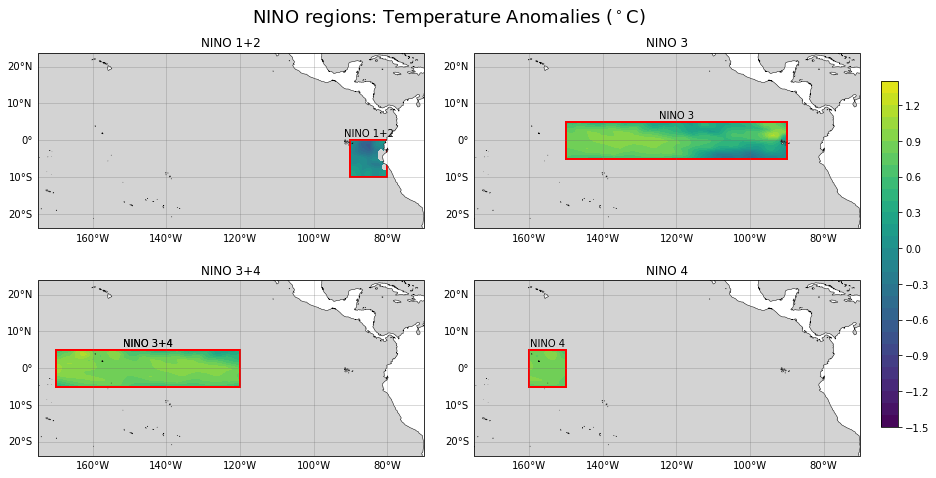

In [7]:
vmin, vmax = -1.5, 1.5
levels     = np.arange(vmin, vmax, 0.1)
cmap       = 'viridis'
nrows, ncols = 2, 2

transform  = ccrs.PlateCarree()
projection = ccrs.PlateCarree()

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8), 
                        subplot_kw={'projection': projection})

ocean = cfeature.NaturalEarthFeature('physical', 'ocean', scale='50m', 
                                     edgecolor='none', 
                                     facecolor=cfeature.COLORS['water'])
land = cfeature.NaturalEarthFeature('physical', 'land', scale='50m', 
                                     edgecolor='k', 
                                     facecolor=cfeature.COLORS['land'],
                                     linewidth=0.5)

def ax_settings(ax):
    ax.set_extent([-175., -70., -15., 15.])
    gl = ax.gridlines(draw_labels=True, dms=True, linewidth=0.5, color='dimgray', alpha=0.5)
    gl.top_labels = gl.right_labels = False
    ax.add_feature(land, facecolor='white', zorder=2)
    ax.add_feature(ocean, facecolor='lightgray', zorder=0)
    return ax

#-- NINO 1+2
ax = ax_settings(axs[0,0])
plot12 = ax.contourf(tos_anom12.lon, tos_anom12.lat, tos_anom12[0], 
                       vmin=vmin, vmax=vmax, levels=levels, cmap=cmap, 
                       transform=transform)
draw_boundary(ax=ax, lon0=-90., lon1=-80., lat0=-10., lat1=0., title='NINO 1+2')
ax.set_title("NINO 1+2", fontsize=12)

#-- NINO 3
ax = ax_settings(axs[0,1])
plot3 = ax.contourf(tos_anom3.lon, tos_anom3.lat, tos_anom3[0], 
                       vmin=vmin, vmax=vmax, levels=levels, cmap=cmap, 
                       transform=transform)
draw_boundary(ax=ax, lon0=-150., lon1=-90., lat0=-5., lat1=5., title='NINO 3')
ax.set_title("NINO 3", fontsize=12)

#-- NINO 3+4
ax = ax_settings(axs[1,0])
plot34 = ax.contourf(tos_anom34.lon, tos_anom34.lat, tos_anom34[0], 
                       vmin=vmin, vmax=vmax, levels=levels, cmap=cmap, 
                       transform=transform)
draw_boundary(ax=ax, lon0=-170., lon1=-120., lat0=-5., lat1=5., title='NINO 3+4')
ax.text(-145, 6, 'NINO 3+4', ha='center')
ax.set_title("NINO 3+4", fontsize=12)

#-- NINO 4
ax = ax_settings(axs[1,1])
plot4 = ax.contourf(tos_anom4.lon, tos_anom4.lat, tos_anom4[0], 
                       vmin=vmin, vmax=vmax, levels=levels, cmap=cmap, 
                       transform=transform)
draw_boundary(ax=ax, lon0=-160., lon1=-150., lat0=-5., lat1=5., title='NINO 4')
ax.set_title("NINO 4", fontsize=12)

#-- set space for the plots
bottom, top = 0.2, 0.9
left, right = 0.1, 0.9
w_space, h_space = -0.1, 0.3

fig.subplots_adjust(bottom=bottom, top=top, left=left, right=right,
                    wspace=w_space, hspace=h_space)

#-- add a colorbar
cbar_width, cbar_height = 0.015, 0.6
cbar_left, cbar_bottom = right-0.025, ((top-bottom-cbar_height)/2)+bottom

cbar_ax = fig.add_axes([cbar_left, cbar_bottom, cbar_width, cbar_height]) #-- left, bottom, width, height
cbar = fig.colorbar(plot4, cax=cbar_ax, orientation='vertical')

#-- add a main title
plt.suptitle('NINO regions: Temperature Anomalies ($^\circ$C)', fontsize=18)

----

## Plot NINOs in one

#### Create the plot

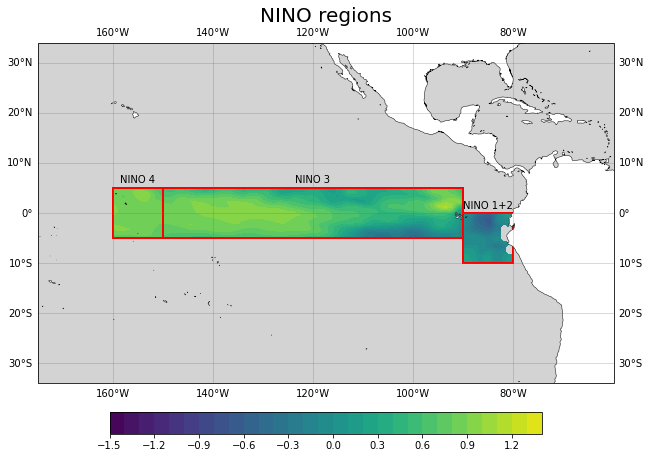

In [8]:
vmin, vmax = -1.5, 1.5
levels     = np.arange(vmin, vmax, 0.1)
cmap       = 'viridis'

transform  = ccrs.PlateCarree()
projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.set_extent([-175., -60., -20., 20.])
ax.gridlines(draw_labels=True, dms=True, linewidth=0.5, color='dimgray', alpha=0.5)

ocean = cfeature.NaturalEarthFeature('physical', 'ocean', scale='50m', 
                                      edgecolor='none', 
                                      facecolor=cfeature.COLORS['water'])
land = cfeature.NaturalEarthFeature('physical', 'land', scale='50m', 
                                     edgecolor='k', 
                                     facecolor=cfeature.COLORS['land'],
                                     linewidth=0.5)

ax.add_feature(land, facecolor='white', zorder=2)
ax.add_feature(ocean, facecolor='lightgray', zorder=0)

#-- NINO 1+2
plot12 = ax.contourf(tos_anom12.lon, tos_anom12.lat, tos_anom12[0], 
                     vmin=vmin, vmax=vmax, levels=levels,
                     cmap=cmap, transform=transform)
draw_boundary(ax=ax, lon0=-90., lon1=-80., lat0=-10., lat1=0., title='NINO 1+2')

cbar = plt.colorbar(plot12, orientation='horizontal', shrink=0.75, pad=0.05)

plt.title("NINO regions", fontsize=20)

#-- NINO 3
plot3 = ax.contourf(tos_anom3.lon, tos_anom3.lat, tos_anom3[0], 
                    vmin=vmin, vmax=vmax, levels=levels,
                    cmap=cmap, transform=transform)
draw_boundary(ax=ax, lon0=-150., lon1=-90., lat0=-5., lat1=5., title='NINO 3')

#-- NINO 4
plot4 = ax.contourf(tos_anom4.lon, tos_anom4.lat, tos_anom4[0], 
                    vmin=vmin, vmax=vmax, levels=levels,
                    cmap=cmap, transform=transform)
draw_boundary(ax=ax, lon0=-160., lon1=-150., lat0=-5., lat1=5., title='NINO 4')

#plt.savefig('plot_NINOs.png', bbox_inches='tight', dpi=50)

----

## NINO 3.4 SST Index

----

### Compute the time series of NINO 3.4 anomalies

Appropriate CDO call: 

```
tos_anom34_ts = cdo.fldmean(input='-ymonsub -sellonlatbox,-170,-120,-5,5 '+fname+\
                                 ' -ymonavg -sellonlatbox,-170,-120,-5,5 '+fname,
                            returnXArray='tos')
tos_anom34_ts = tos_anom34_ts.squeeze()
```

In [9]:
tos_anom34_ts = tos_anom34.mean(('lon', 'lat'))

----

### Compute the running mean

In [10]:
tos_anom34_ts_runmean = tos_anom34_ts.rolling(time=5, center=True).mean()

----

### Plot anomaly time series

Plot the time series of NINO 3.4 anomaly and its running mean.

Text(0.5, 1.0, 'SST (tos) anomaly over the Niño 3.4 region')

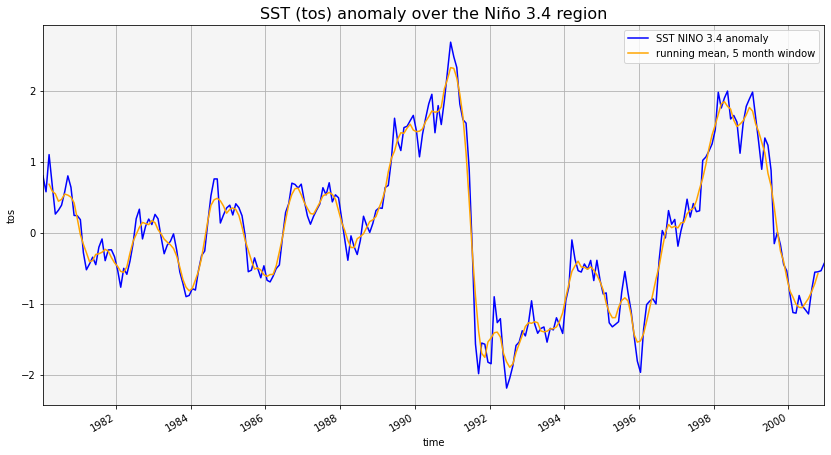

In [11]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_facecolor('whitesmoke')
ax.grid()
ax.set_xlim(min(tos_anom34_ts.time), max(tos_anom34_ts.time))

tos_anom34_ts.plot(label='SST NINO 3.4 anomaly', color='blue')
tos_anom34_ts_runmean.plot(label='running mean, 5 month window', color='orange')

plt.legend()
plt.title('SST (tos) anomaly over the Niño 3.4 region', fontsize=16)

----

### Normalize the values 

Normalize the values by dividing the running mean by the standard deviation.

In [12]:
tos34  = cdo.sellonlatbox('-170,-120,-5,5', input=fname, returnXArray='tos')

norm_nino34_runmean = tos_anom34_ts / tos34.std()

----

### Plot NINO 3.4 Index

The values above 0.4 corresponds to El Niño (warm, in red) and the values below -0.4 corresponds to La Niña (cold, in blue) events.

Text(0.5, 1.0, 'Example: NINO 3.4 Index')

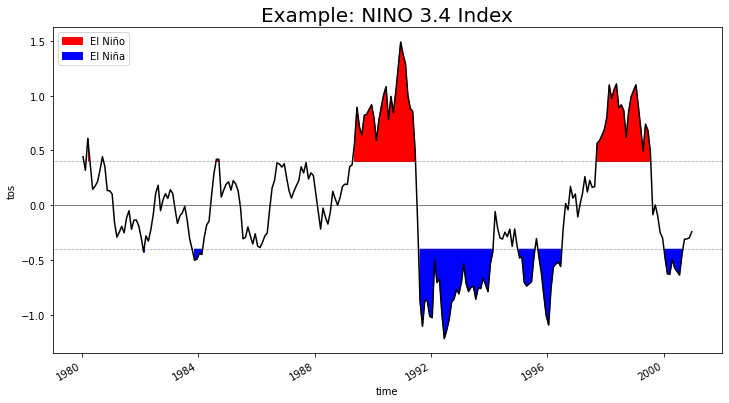

In [13]:
fig = plt.figure(figsize=(12, 6))

plt.fill_between(norm_nino34_runmean.time.data,
                 norm_nino34_runmean.where(norm_nino34_runmean >= 0.4).data,
                 0.4,
                 color='red',
                 label='El Niño')

plt.fill_between(norm_nino34_runmean.time.data,
                 norm_nino34_runmean.where(norm_nino34_runmean <= -0.4).data,
                 -0.4,
                 color='blue',
                 label='El Niña')

norm_nino34_runmean.plot(color='black')

plt.axhline( 0.0, color='black', linewidth=0.5)
plt.axhline( 0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-0.4, color='black', linewidth=0.5, linestyle='dotted')

plt.legend(loc='upper left')

plt.title('Example: NINO 3.4 Index', fontsize=20)